In [8]:
import pandas as pd

In [9]:
dataset = pd.read_csv("pd_speech_features.csv")
dataset = dataset.drop(['id'],axis=1)

C:\Users\senso\AppData\Local\Temp\ipykernel_8060\1864689445.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[attribute], ax=axs[i], color='skyblue', kde_kws={"color": "darkblue", "lw": 2})
C:\Users\senso\AppData\Local\Temp\ipykernel_8060\1864689445.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

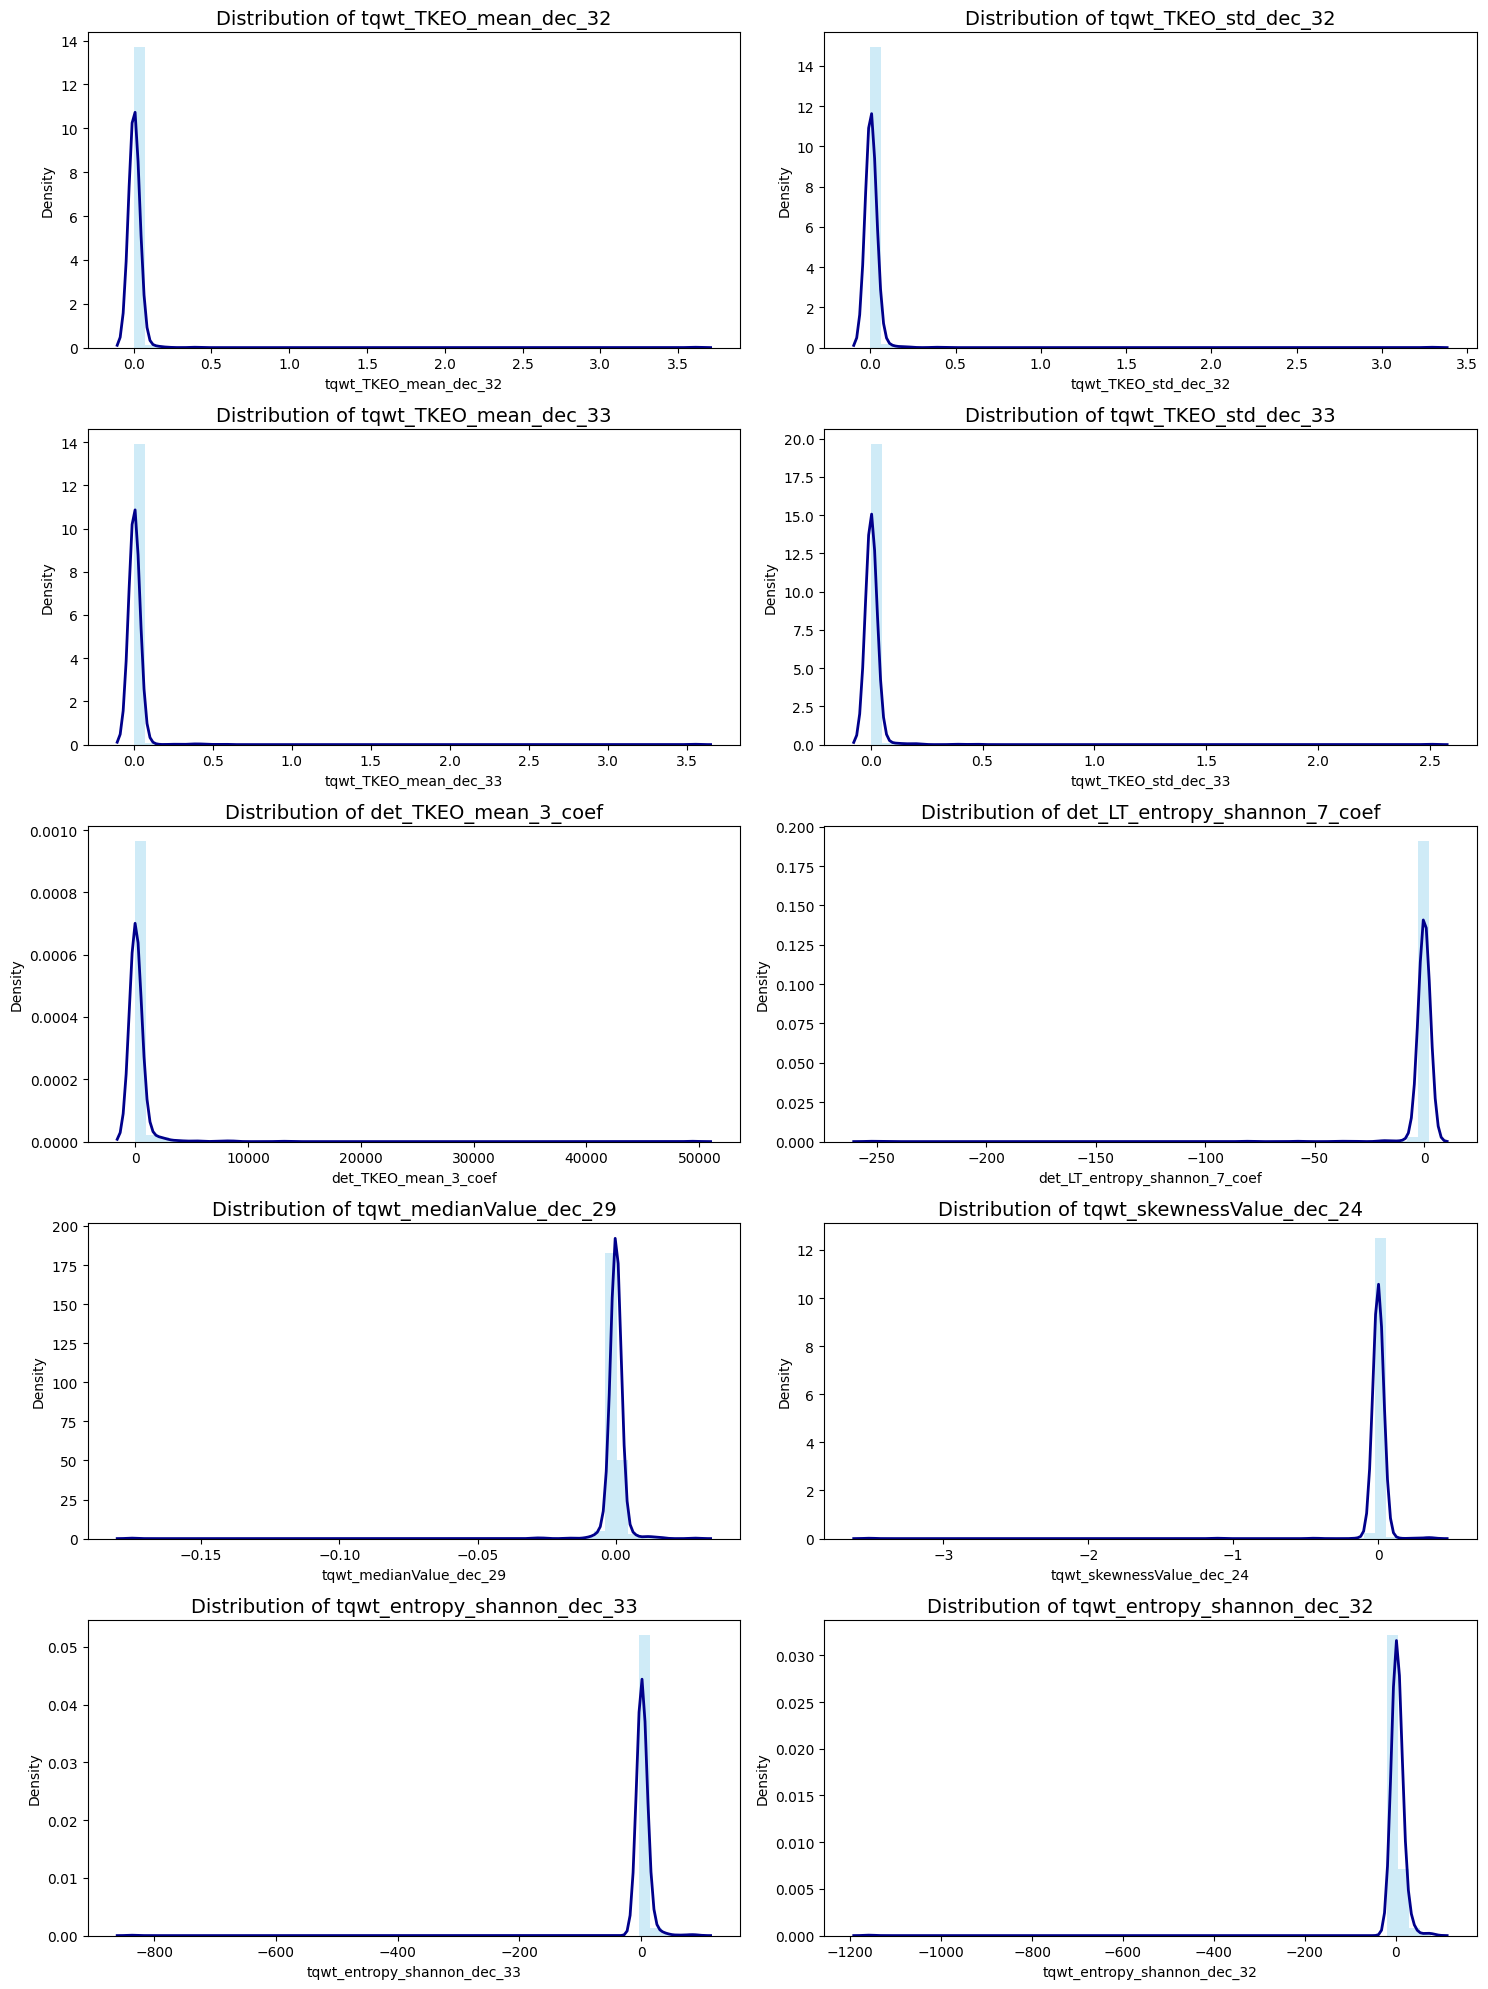

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of attributes to plot
attributes_to_plot = ['tqwt_TKEO_mean_dec_32', 'tqwt_TKEO_std_dec_32', 'tqwt_TKEO_mean_dec_33', 'tqwt_TKEO_std_dec_33', 'det_TKEO_mean_3_coef', 
                      'det_LT_entropy_shannon_7_coef', 'tqwt_medianValue_dec_29', 'tqwt_skewnessValue_dec_24', 'tqwt_entropy_shannon_dec_33', 'tqwt_entropy_shannon_dec_32']

# Create a 5x2 grid of plots (adjust as needed)
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the axes array so we can easily iterate over it
axs = axs.flatten()

# Plot the distribution of each attribute
for i, attribute in enumerate(attributes_to_plot):
    sns.distplot(dataset[attribute], ax=axs[i], color='skyblue', kde_kws={"color": "darkblue", "lw": 2})
    axs[i].set_title(f'Distribution of {attribute}', fontsize=14)
    axs[i].set_ylabel('Density')

# Remove empty plots
for i in range(len(attributes_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

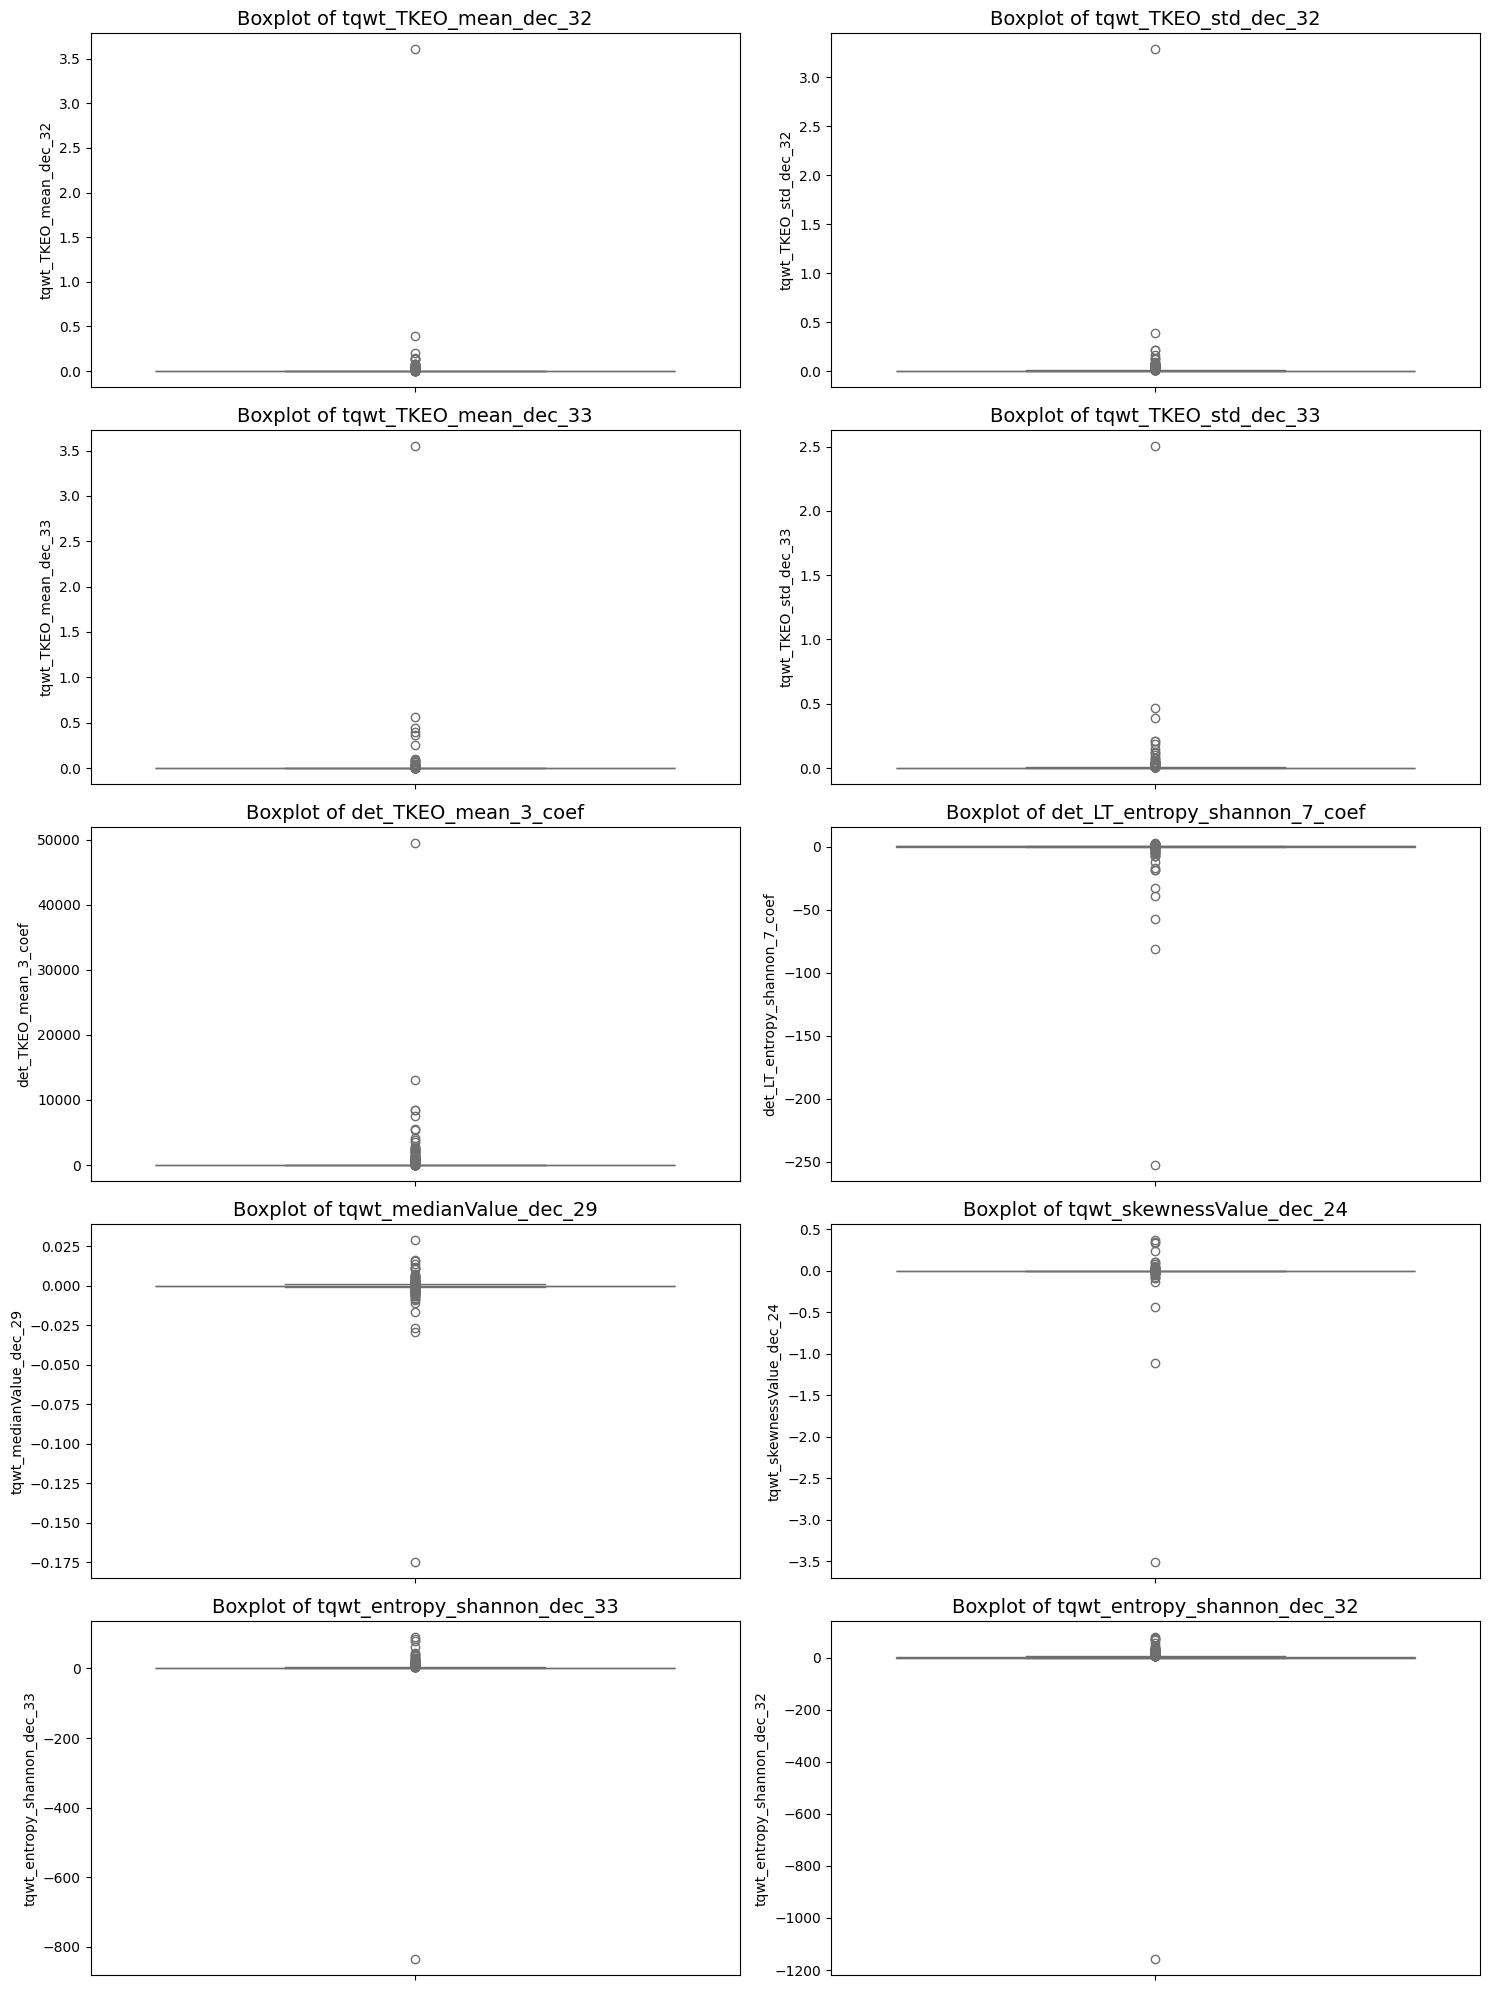

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of attributes to plot
attributes_to_plot = ['tqwt_TKEO_mean_dec_32', 'tqwt_TKEO_std_dec_32', 'tqwt_TKEO_mean_dec_33', 'tqwt_TKEO_std_dec_33', 'det_TKEO_mean_3_coef', 
                      'det_LT_entropy_shannon_7_coef', 'tqwt_medianValue_dec_29', 'tqwt_skewnessValue_dec_24', 'tqwt_entropy_shannon_dec_33', 'tqwt_entropy_shannon_dec_32']

# Create a 5x2 grid of plots (adjust as needed)
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the axes array so we can easily iterate over it
axs = axs.flatten()

# Plot the distribution of each attribute
for i, attribute in enumerate(attributes_to_plot):
    sns.boxplot(y=dataset[attribute], ax=axs[i], color='skyblue')
    axs[i].set_title(f'Boxplot of {attribute}', fontsize=14)

# Remove empty plots
for i in range(len(attributes_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [12]:
from scipy import stats
import numpy as np

column_names = list(dataset.columns)
column_names = column_names[:-1]

skewedCols = []
for names in column_names:
    skewVal = dataset[names].skew()
    if(skewVal>1 or skewVal<-1):
        skewedCols.append(names)
# print(skewedCols)
# print(len(skewedCols))
        
#   Name of the cols containing atleast one negative value
skewedCols_NegativeVals = []
for col_name in skewedCols:
    for values in dataset[col_name]:
        if(values < 0):
            skewedCols_NegativeVals.append(col_name)
            break
print(len(skewedCols_NegativeVals))

#   Name of the cols containing atleast one zero values
skewedCols_ZeroVals = []
for col_name in skewedCols:
    if col_name in skewedCols_NegativeVals:
        continue
    else:
        for values in dataset[col_name]:
            if(values == 0):
                skewedCols_ZeroVals.append(col_name)
                break
print(len(skewedCols_ZeroVals))

#   Name of the cols containing only positive values
skewedCols_PositiveVals = []
for col_name in skewedCols:
    if (col_name not in skewedCols_NegativeVals and col_name not in skewedCols_ZeroVals):
        skewedCols_PositiveVals.append(col_name)
print(len(skewedCols_PositiveVals))


for col_name in skewedCols_PositiveVals:
    dataset[col_name] = stats.boxcox(dataset[col_name],lmbda=0)

count = 0
for col_name in skewedCols_PositiveVals:
    skewVal = dataset[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1

for col_name in skewedCols_NegativeVals:
    dataset[col_name] = np.cbrt(dataset[col_name])
for col_name in skewedCols_ZeroVals:
    dataset[col_name] = np.cbrt(dataset[col_name])

count = 0
for col_name in skewedCols_NegativeVals:
    skewVal = dataset[col_name].skew()
    if skewVal>1 or skewVal<-1:
        count = count + 1

147
1
378


C:\Users\senso\AppData\Local\Temp\ipykernel_8060\1864689445.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[attribute], ax=axs[i], color='skyblue', kde_kws={"color": "darkblue", "lw": 2})
C:\Users\senso\AppData\Local\Temp\ipykernel_8060\1864689445.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

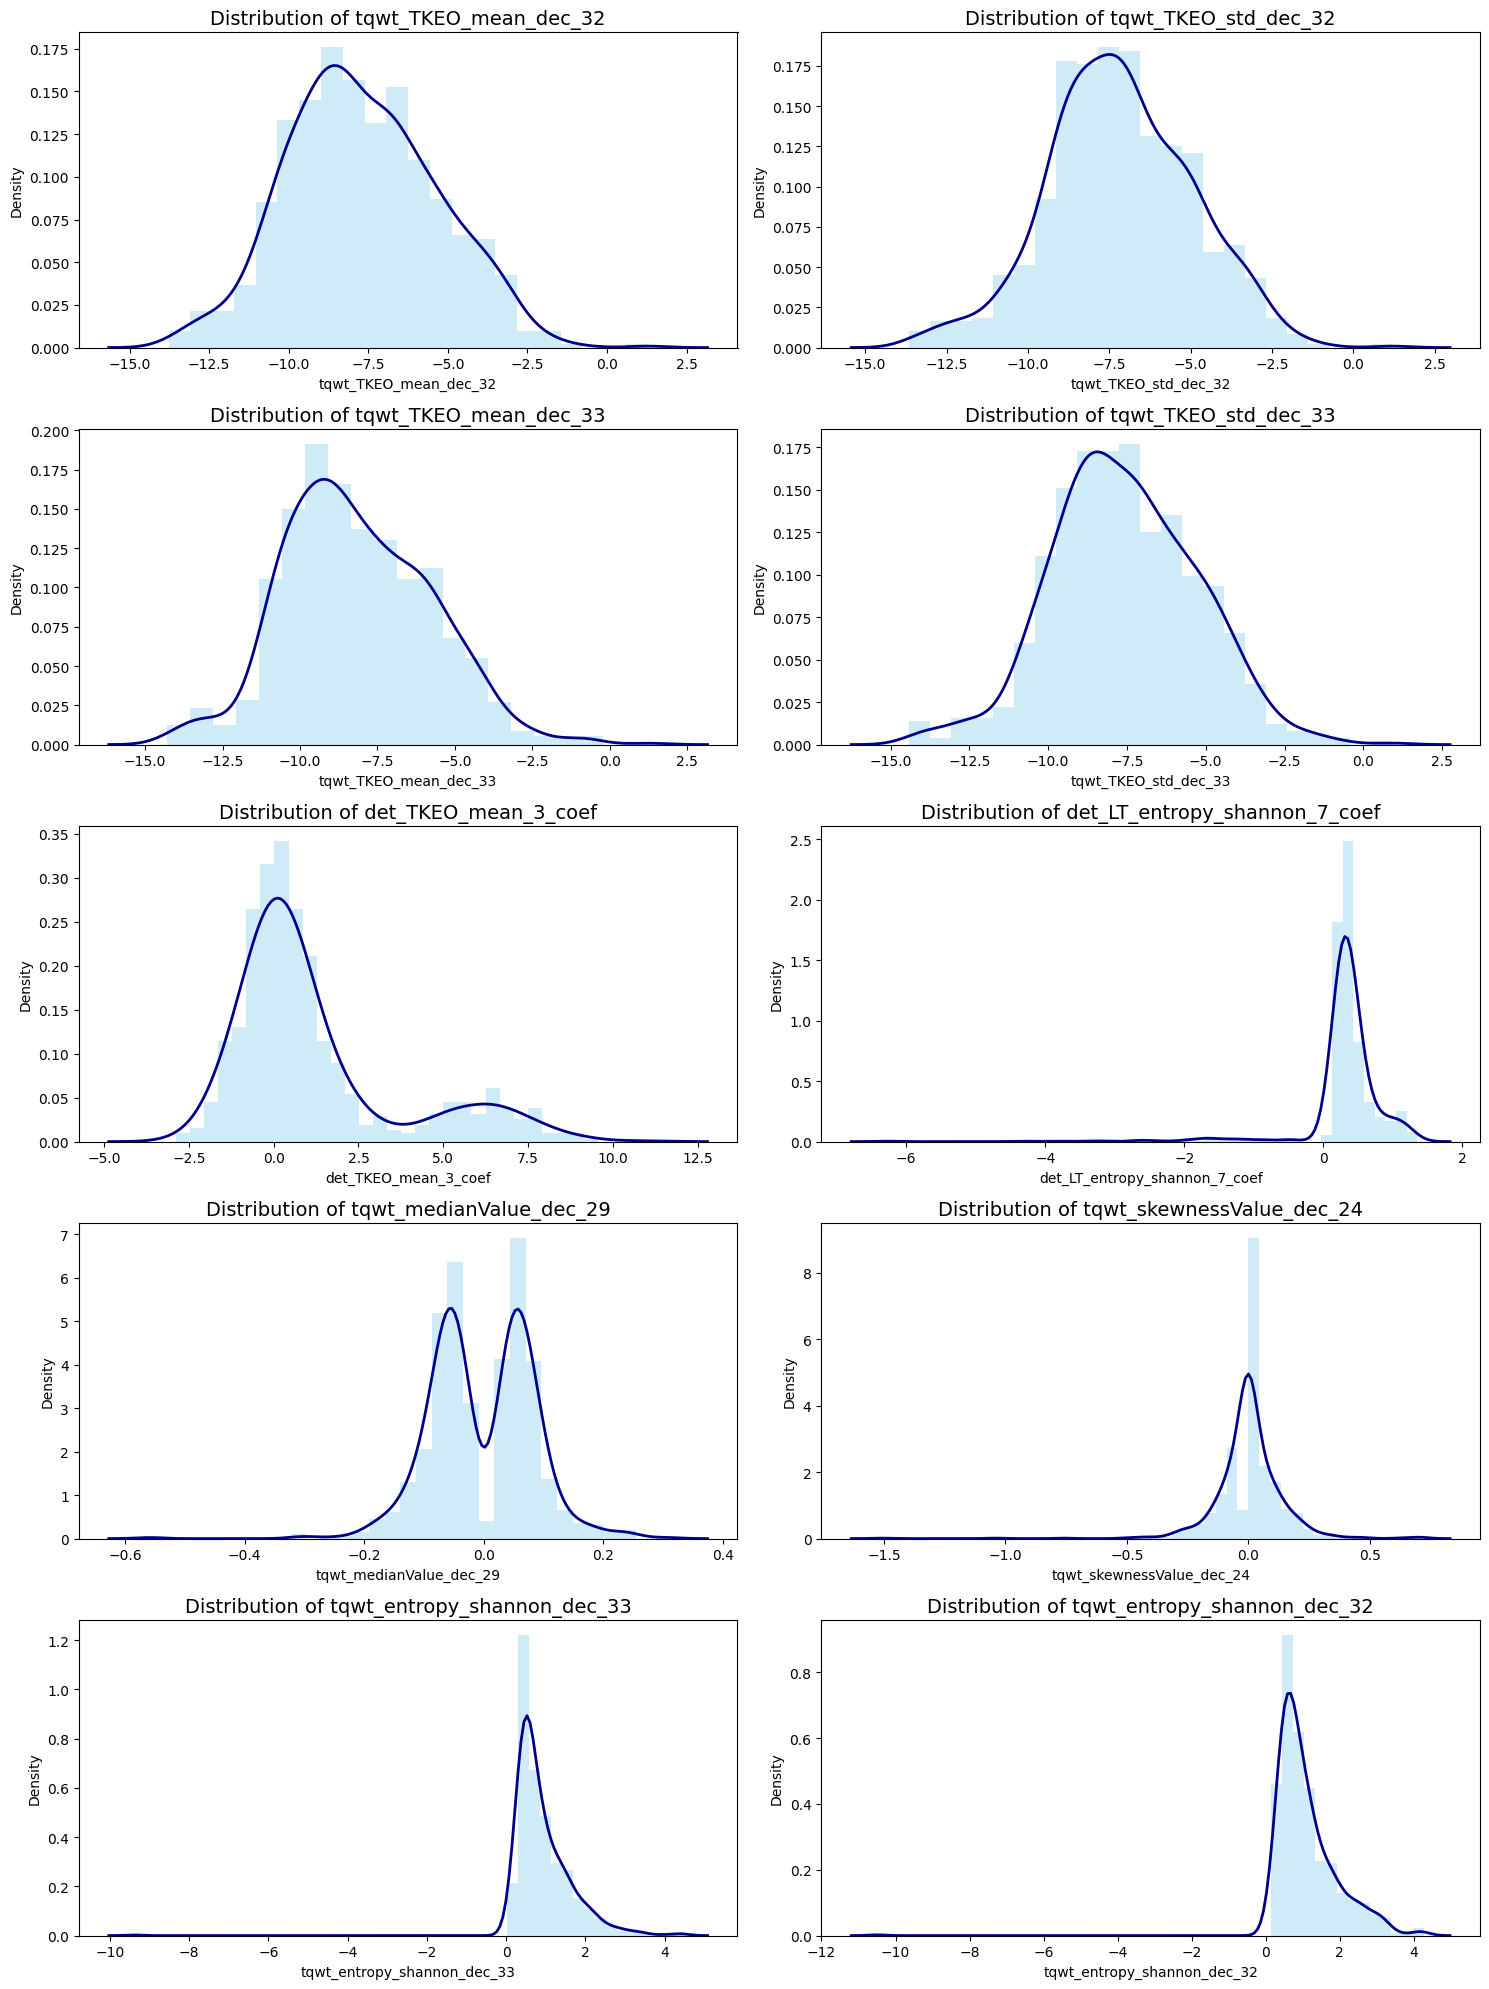

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of attributes to plot
attributes_to_plot = ['tqwt_TKEO_mean_dec_32', 'tqwt_TKEO_std_dec_32', 'tqwt_TKEO_mean_dec_33', 'tqwt_TKEO_std_dec_33', 'det_TKEO_mean_3_coef', 
                      'det_LT_entropy_shannon_7_coef', 'tqwt_medianValue_dec_29', 'tqwt_skewnessValue_dec_24', 'tqwt_entropy_shannon_dec_33', 'tqwt_entropy_shannon_dec_32']

# Create a 5x2 grid of plots (adjust as needed)
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the axes array so we can easily iterate over it
axs = axs.flatten()

# Plot the distribution of each attribute
for i, attribute in enumerate(attributes_to_plot):
    sns.distplot(dataset[attribute], ax=axs[i], color='skyblue', kde_kws={"color": "darkblue", "lw": 2})
    axs[i].set_title(f'Distribution of {attribute}', fontsize=14)
    axs[i].set_ylabel('Density')

# Remove empty plots
for i in range(len(attributes_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()